<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework Lab 11**

## Theory Explanation

### Question 1: What is a transposed convolution?

A transposed convolution (also called deconvolution) is a type of operation used to increase the spatial dimensions (height and width) of a feature map. It is essentially the opposite of a regular convolution.

It allows you to go from a smaller feature map to a larger one by projecting each value in the input onto a region of the output, using a kernel.

Even though it's called a "convolution", a transposed convolution is not the mathematical inverse of a standard convolution. It doesn't recover the exact original input from the output, and it doesn't "undo" a convolution in the strict algebraic sense. Instead, it's based on how gradients are passed backward through a convolutional layer during training.

In that backward process, the gradients spread out, and this spreading can be used to increase the size of a feature map. That's why transposed convolution is often used in decoders: it helps upsample or reconstruct larger outputs from smaller inputs.

The kernel in a transposed convolution works the same way as in a normal convolution: it determines how each value in the input spreads over the output. Choosing the right kernel size and weights is important because it defines how much neighboring pixels influence each other during upsampling. During training, these weights are learned to produce realistic or meaningful reconstructions.

### Question 2: How does it differ from a regular convolution?

In a regular convolution, the kernel slides across the input and combines neighborhoods to produce a smaller output.

In a transposed convolution, we do the opposite: each input value is spread or projected into a larger output area, using the kernel weights.


### Question 3: How does it upsample feature maps?

Transposed convolution upsamples by inserting space between pixels, then applying the kernel in a way that fills in values across overlapping regions.

Step-by-step:
1. For each input value, place a copy of the kernel scaled by that value onto the output grid.

2. The top-left corner of the kernel is placed at position (i * stride - padding, j * stride - padding) in the output.

3. All the contributions are added together (since overlaps happen).

The final result is a larger output, where the input values have influenced a wider region.

It can be thought as the reverse of a standard convolution: instead of summarizing a region, we are expanding each pixel into a region.

### Question 4: What are stride, padding, and kernel size, and how do they influence the result in a transposed convolution?
- **Kernel size (k)**: This is the size of the filter applied. It determines how far each input value spreads into the output. A larger kernel affects more pixels in the output.

- **Stride (s)**: Stride controls how far apart the kernel projections are in the output. A higher stride increases the output size, by creating more space between projections.

Example: stride 2 inserts a gap of 1 zero between projected positions.

- **Padding (p)**: Padding in transposed convolutions is a bit counterintuitive:
More padding leads to smaller output. It shifts projections further inward, which reduces how far the kernel reaches.

**Output size formula:**

For 2D inputs:
$$\text{output_size} = (i - 1) \cdot s - 2p + k
$$
Where:

$i = \text{input size}\\
s = \text{stride}\\
p = \text{padding}\\
k = \text{kernel size} $



## Manual Diagram

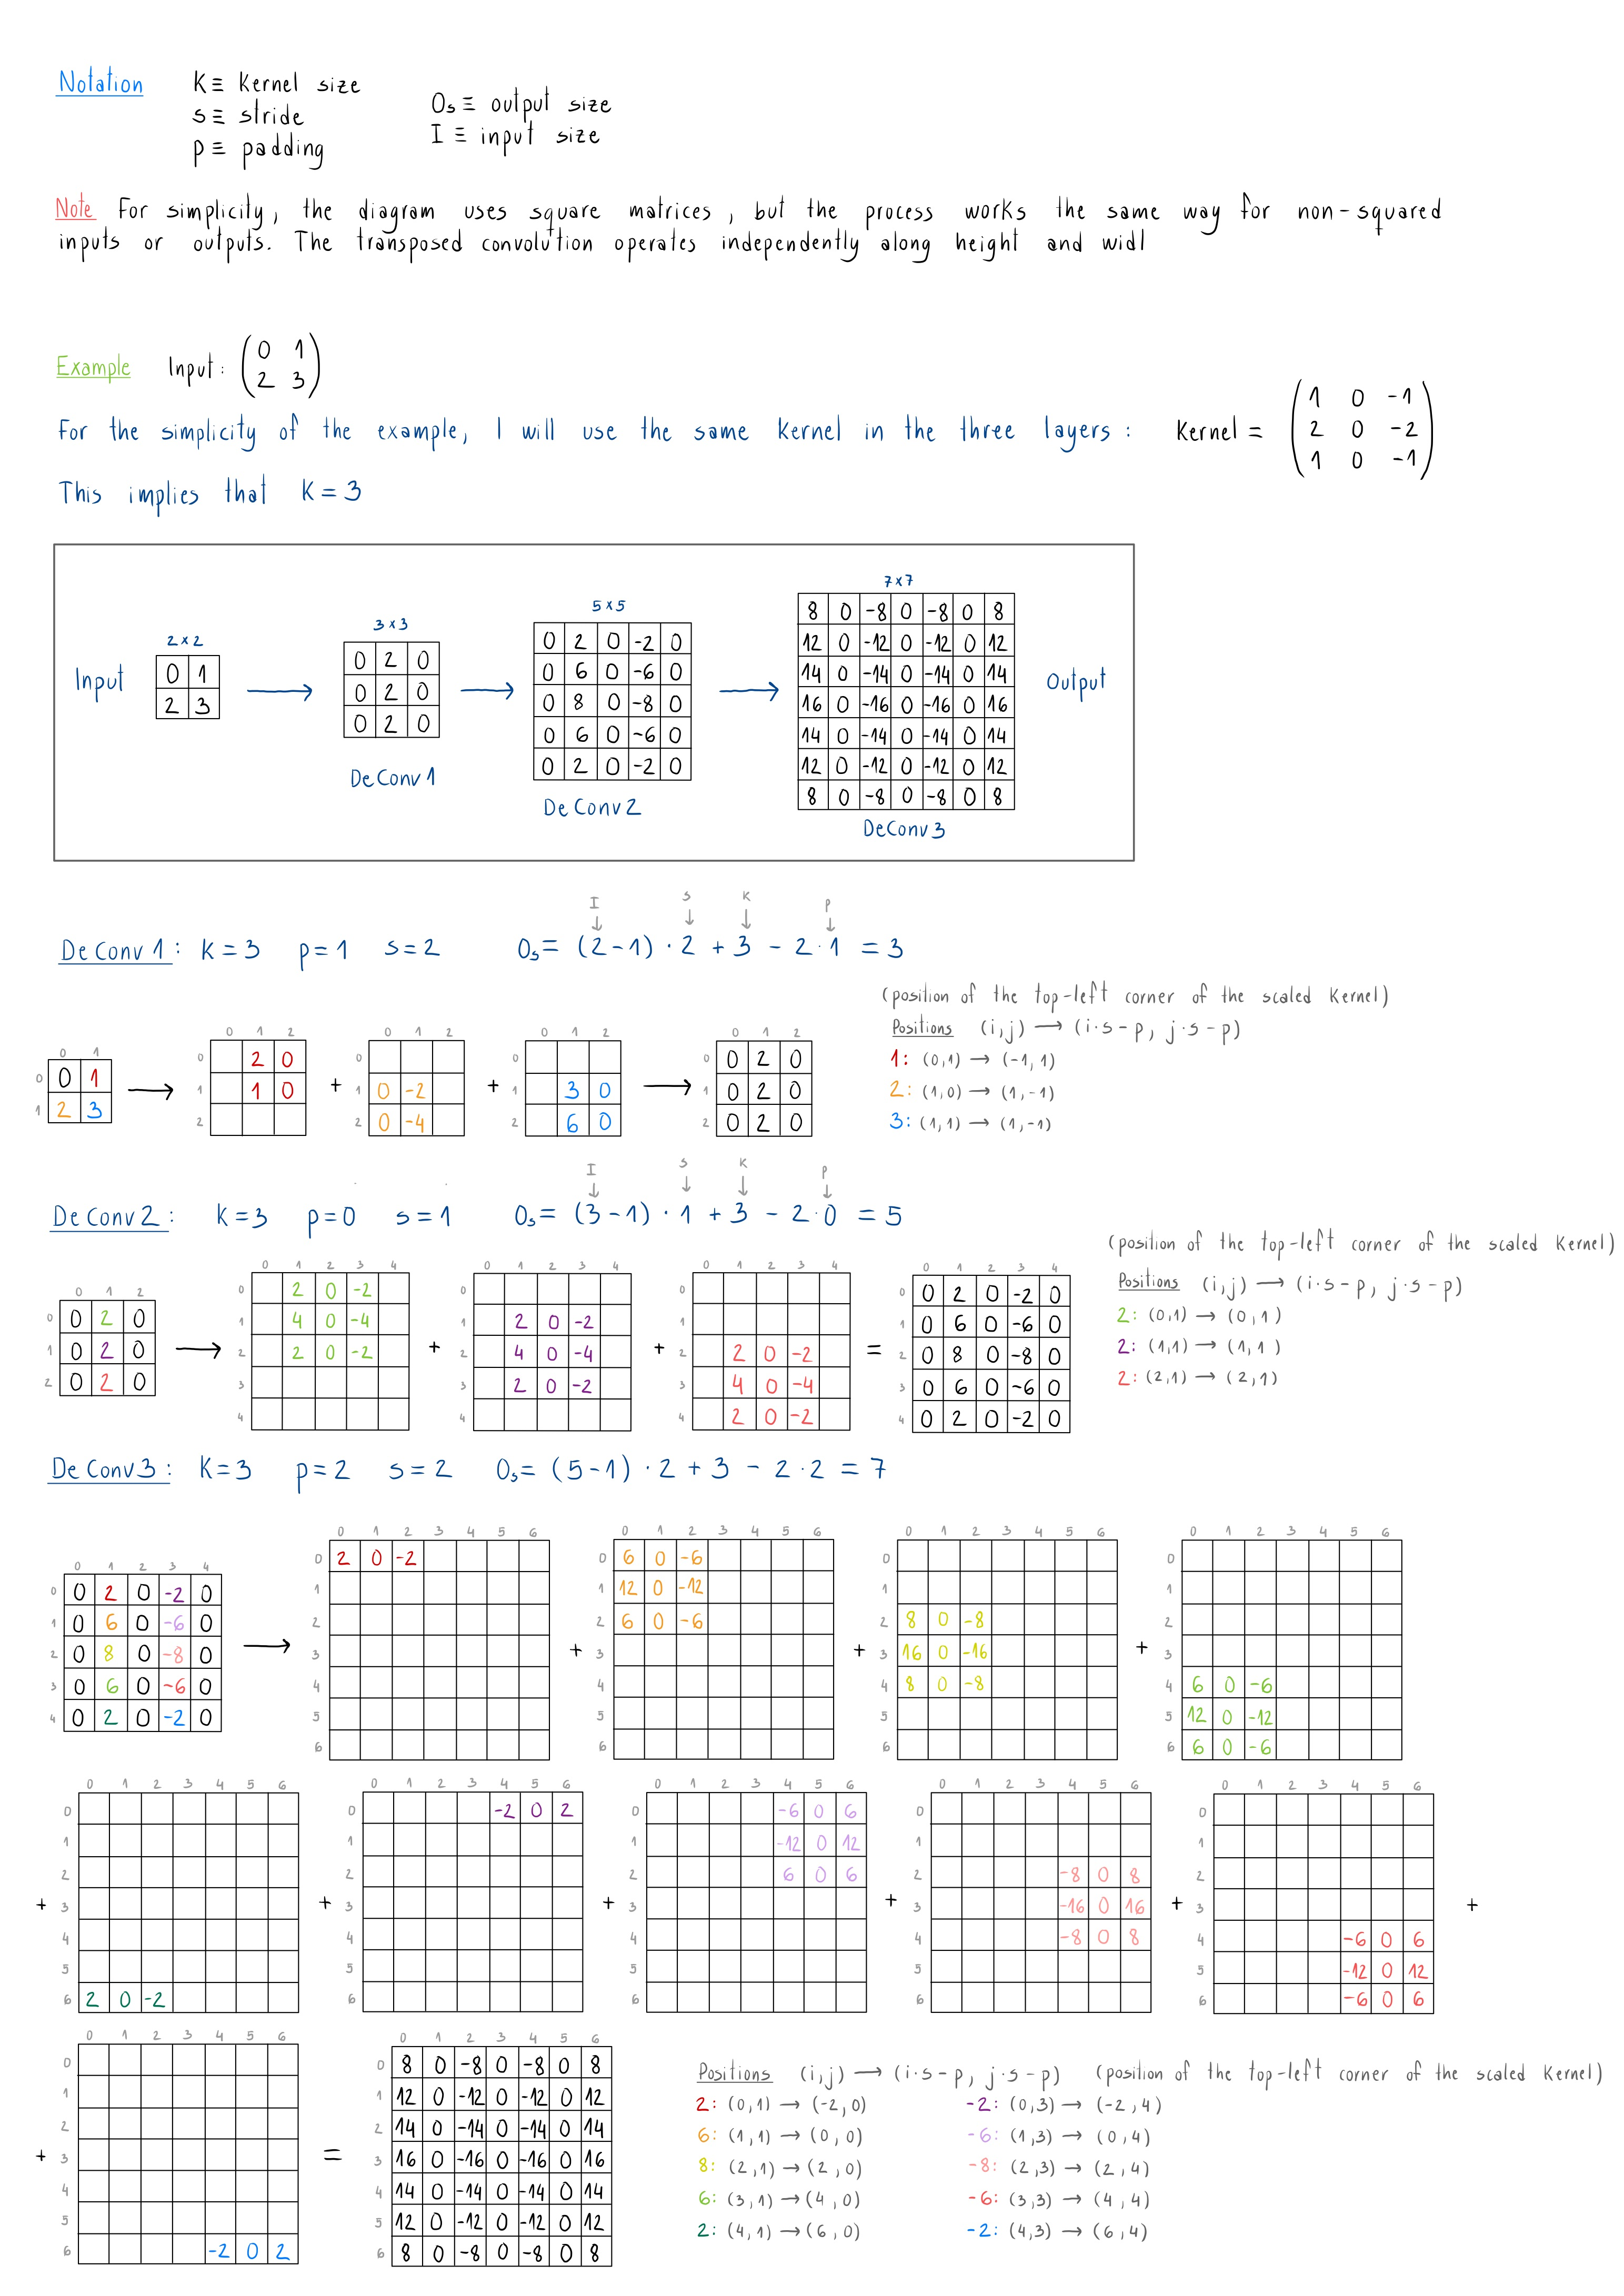

Now, let's verify the results using Python.

In [1]:
import torch
import torch.nn as nn

# We create the input
input_tensor = torch.tensor([[[[0., 1.],
                               [2., 3.]]]])  # shape: [1, 1, 2, 2]

# We define the transposed convolution process

deconv1 = nn.ConvTranspose2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    stride=2,
    padding=1,
    bias=False
)

deconv2 = nn.ConvTranspose2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    stride=1,
    padding=0,
    bias=False
)

deconv3 = nn.ConvTranspose2d(
    in_channels=1,
    out_channels=1,
    kernel_size=3,
    stride=2,
    padding=2,
    bias=False
)

# We manually established the kernel
kernel = torch.tensor([[[[1., 0., -1.],
                         [2., 0., -2.],
                         [1., 0., -1.]]]])  # shape: [1, 1, 3, 3]
deconv1.weight.data = kernel
deconv2.weight.data = kernel
deconv3.weight.data = kernel

# We apply transposed convolution
output1 = deconv1(input_tensor)
output2 = deconv2(output1)
output3 = deconv3(output2)

# We show the result
print("Output 1 shape:", output1.shape)
print(output1)

print("Output 2 shape:", output2.shape)
print(output2)

print("Output 3 shape:", output3.shape)
print(output3)

Output 1 shape: torch.Size([1, 1, 3, 3])
tensor([[[[0., 2., 0.],
          [0., 2., 0.],
          [0., 2., 0.]]]], grad_fn=<ConvolutionBackward0>)
Output 2 shape: torch.Size([1, 1, 5, 5])
tensor([[[[ 0.,  2.,  0., -2.,  0.],
          [ 0.,  6.,  0., -6.,  0.],
          [ 0.,  8.,  0., -8.,  0.],
          [ 0.,  6.,  0., -6.,  0.],
          [ 0.,  2.,  0., -2.,  0.]]]], grad_fn=<ConvolutionBackward0>)
Output 3 shape: torch.Size([1, 1, 7, 7])
tensor([[[[  8.,   0.,  -8.,   0.,  -8.,   0.,   8.],
          [ 12.,   0., -12.,   0., -12.,   0.,  12.],
          [ 14.,   0., -14.,   0., -14.,   0.,  14.],
          [ 16.,   0., -16.,   0., -16.,   0.,  16.],
          [ 14.,   0., -14.,   0., -14.,   0.,  14.],
          [ 12.,   0., -12.,   0., -12.,   0.,  12.],
          [  8.,   0.,  -8.,   0.,  -8.,   0.,   8.]]]],
       grad_fn=<ConvolutionBackward0>)
